In [1]:
import os
os.getcwd()

'C:\\Users\\LETPC'

In [2]:
import pandas as pd
import recordlinkage as rcl
import jellyfish

In [40]:
df_1 = pd.read_csv('tableA.csv', skip_blank_lines=True)
df_2 = pd.read_csv('tableB.csv', skip_blank_lines=True)


In [41]:
df_1

,id,name,addr,city,phone,type,class
0,0,` arnie morton \ 's of chicago ',' 435 s. la cienega blv . ',` los angeles ',310/246 -1501,american,0
1,1,` art \ 's delicatessen ',' 12224 ventura blvd. ',` studio city ',818/762 -1221,american,1
2,2,` hotel bel-air ',' 701 stone canyon rd. ',` bel air ',310/472 -1211,californian,2
3,3,` cafe bizou ',' 14016 ventura blvd. ',` sherman oaks ',818/788 -3536,french,3
4,4,campanile,' 624 s. la brea ave. ',` los angeles ',213/938 -1447,american,4
...,...,...,...,...,...,...,...
528,528,` yank sing ',' 427 battery st. ',` san francisco ',415/541 -4949,asian,528
529,529,` yaya cuisine ',' 1220 9th ave. ',` san francisco ',415/566 -6966,` greek and middle eastern ',529
530,530,` yoyo tsumami bistro ',' 1611 post st. ',` san francisco ',415/922 -7788,french,530
531,531,zarzuela,' 2000 hyde st. ',` san francisco ',415/346 -0800,` mexican/latin american/spanish ',531


In [44]:
df_1.phone = df_1.phone.str.replace("/", "-")
df_1

,id,name,addr,city,phone,type,class
0,0,` arnie morton \ 's of chicago ',' 435 s. la cienega blv . ',` los angeles ',310-246 -1501,american,0
1,1,` art \ 's delicatessen ',' 12224 ventura blvd. ',` studio city ',818-762 -1221,american,1
2,2,` hotel bel-air ',' 701 stone canyon rd. ',` bel air ',310-472 -1211,californian,2
3,3,` cafe bizou ',' 14016 ventura blvd. ',` sherman oaks ',818-788 -3536,french,3
4,4,campanile,' 624 s. la brea ave. ',` los angeles ',213-938 -1447,american,4
...,...,...,...,...,...,...,...
528,528,` yank sing ',' 427 battery st. ',` san francisco ',415-541 -4949,asian,528
529,529,` yaya cuisine ',' 1220 9th ave. ',` san francisco ',415-566 -6966,` greek and middle eastern ',529
530,530,` yoyo tsumami bistro ',' 1611 post st. ',` san francisco ',415-922 -7788,french,530
531,531,zarzuela,' 2000 hyde st. ',` san francisco ',415-346 -0800,` mexican/latin american/spanish ',531


In [45]:
df_2.head(3)

,id,name,addr,city,phone,type,class
0,0,` apple pan the ',' 10801 w. pico blvd. ',` west la ',310-475-3585,american,534
1,1,` asahi ramen ',' 2027 sawtelle blvd. ',` west la ',310-479-2231,` noodle shops ',535
2,2,` baja fresh ',' 3345 kimber dr. ',` westlake village ',805-498-4049,mexican,536


In [46]:
indexer = rcl.Index()
indexer.block("name") 
pairs = indexer.index(df_1, df_2) 
print(f"""
len of A: {len(df_1)}
len of B: {len(df_2)}
len of Block: {len(pairs)}
""")


len of A: 533
len of B: 331
len of Block: 83



In [49]:
compare_cl = rcl.Compare()
# object này có nvụ kra trên toàn bộ các col trên df, not chỉ trên MultiIndex obj

# exact match
compare_cl.string('phone', 'phone', threshold=0.9, label="match_phone")
# string matching
compare_cl.string('addr', 'addr', threshold=0.50, label="match_addr")
compare_cl.string('city', 'city', threshold=0.50, label="match_city")
compare_cl.string('type', 'type', threshold=0.50, label="match_type")

potential_match = compare_cl.compute(pairs, df_1, df_2)
potential_match

,,match_phone,match_addr,match_city,match_type
0,218,1.0,1.0,1.0,0.0
3,221,1.0,1.0,1.0,0.0
4,222,1.0,1.0,1.0,0.0
5,223,1.0,1.0,1.0,0.0
6,224,1.0,1.0,1.0,1.0
...,...,...,...,...,...
106,324,1.0,1.0,1.0,0.0
108,326,1.0,1.0,1.0,0.0
109,327,1.0,1.0,1.0,0.0
111,329,1.0,1.0,1.0,1.0


In [133]:
thrhld = 3
matches = potential_match[potential_match.sum(axis=1) >= thrhld]
matches

,,match_phone,match_addr,match_city,match_type
0,218,1.0,1.0,1.0,0.0
3,221,1.0,1.0,1.0,0.0
4,222,1.0,1.0,1.0,0.0
5,223,1.0,1.0,1.0,0.0
6,224,1.0,1.0,1.0,1.0
...,...,...,...,...,...
104,322,1.0,1.0,1.0,0.0
106,324,1.0,1.0,1.0,0.0
108,326,1.0,1.0,1.0,0.0
109,327,1.0,1.0,1.0,0.0


In [134]:
# lấy index của df_2 (position 1)
df_2_index_with_dup = matches.index.get_level_values(1) # df of B which is mixed up (duplicated B, B that has A-outer)

# loại duplicate (left-inner-join hóa)
df_2_duplicate = df_2[df_2.index.isin(df_2_index_with_dup)] # df contains index that is duplicated w/ df_1

df_2_no_dup = df_2[~df_2.index.isin(df_2_index_with_dup)] # clean df with only index of df_2

In [135]:
len(df_2_no_dup)

266

In [137]:
series_control = df_2_no_dup.name
err = []
for _ in series_control:
    x = df_1[df_1.name.str.contains(_)].name
    if len(x) > 0:
        err.append(x)

err_margin = len(err)/len(df_2_no_dup)
err_margin

0.07142857142857142

In [146]:
def find_elbow_point(thrhld):
    matches = potential_match[potential_match.sum(axis=1) >= thrhld]
    df_2_index_with_dup = matches.index.get_level_values(1)
    df_2_no_dup = df_2[~df_2.index.isin(df_2_index_with_dup)]
    series_control = df_2_no_dup.name
    err = []
    for _ in series_control:
        x = df_1[df_1.name.str.contains(_)].name
        if len(x) > 0:
            err.append(x)

    err_margin = len(err)/len(df_2_no_dup)
    return err_margin

no_of_matches = [1,2,3,4]
err_margin_list = []
for i in no_of_matches:
    a= find_elbow_point(i)
    err_margin_list.append(a)
    
err_margin_list

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


[0.01606425702811245,
 0.0199203187250996,
 0.07142857142857142,
 0.20063694267515925]

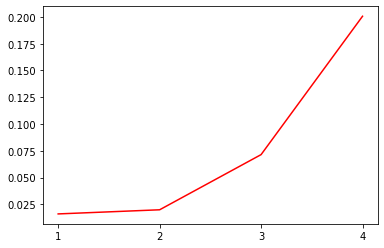

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(no_of_matches, err_margin_list, color ="red")
plt.xticks([1,2,3,4])
plt.show()